# Домашняя работа №1
## Визуализируем данные
Для начала импортируем необходимые библиотеки такие как *pandas* для удобной работы с .csv файлами и *matplotlib*, *seaborn* для визуализации и *numpy* для удобной работы с числами.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Читаем .csv файл, удаляем дубликаты, и переиндексируем значения, чтобы индексы шли по порядку.

In [12]:
df = pd.read_csv('../csv/cars_moldova.csv', delimiter = ',')
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(df)

             Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2      Volkswagen          Golf  1998  Hatchback       1.0   
3         Renault        Laguna  2012  Universal  110000.0   
4            Opel         Astra  2006  Universal  200000.0   
...           ...           ...   ...        ...       ...   
37259  Land Rover    Freelander  2002  Crossover  225000.0   
37260       Dacia     Logan Mcv  2015  Universal   89000.0   
37261     Renault         Modus  2009  Hatchback     225.0   
37262       Mazda             6  2006      Combi  370000.0   
37263     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0                    1800.0        Hybrid    Automatic       7750.0  
1                    1500.0        Diesel       Manual       8550.0  
2                    1400.0        Petrol    

Выбираем числовые и категориальные столбцы для последующего использования в графиках.

In [13]:
category_columns = []
number_columns = []

for column_name in df.columns:
  if df[column_name].dtypes == object:
    category_columns += [column_name]
  else:
    number_columns += [column_name]
    
print('Категориальные данные:\t ',category_columns, '\n Число столблцов = ',len(category_columns))

print('Числовые данные:\t ',  number_columns, '\n Число столблцов = ',len(number_columns))      

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


### Гистограмма
Почистим DataFrame на основе нескольких фильтров, чтобы гистограммы по итогу были более понятны и приятны глазу.

In [14]:
question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

df = df.reset_index(drop=True)
print(df)

             Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32652  Volkswagen        Passat  2016      Sedan   88000.0   
32653  Land Rover    Freelander  2002  Crossover  225000.0   
32654       Dacia     Logan Mcv  2015  Universal   89000.0   
32655       Mazda             6  2006      Combi  370000.0   
32656     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0                    1800.0        Hybrid    Automatic       7750.0  
1                    1500.0        Diesel       Manual       8550.0  
2                    1500.0        Diesel    

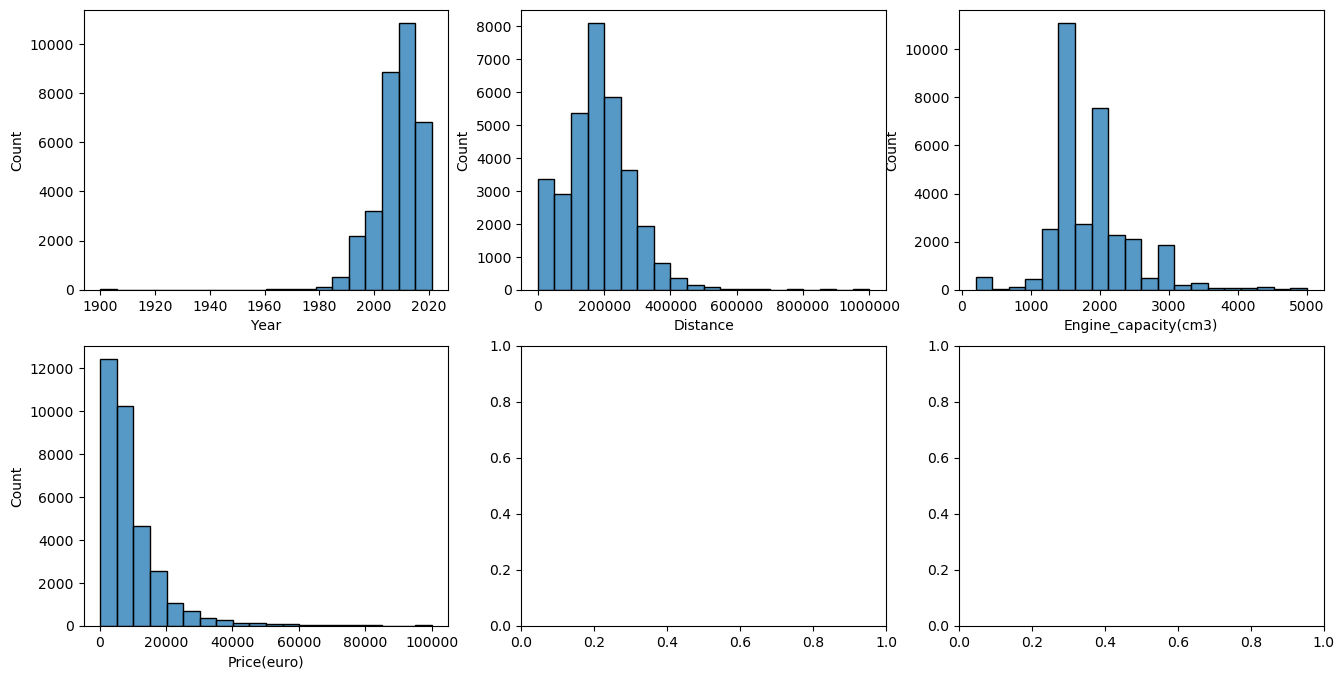

In [15]:
width = 3
height = int(np.ceil(len(number_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(number_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

### Скатерограмма
По заданию,в скатерограмме будем использовать категориальные данные для параметров:
- hue = Fuel_type
- style = Style

И один числовой признак:
- size = Distance

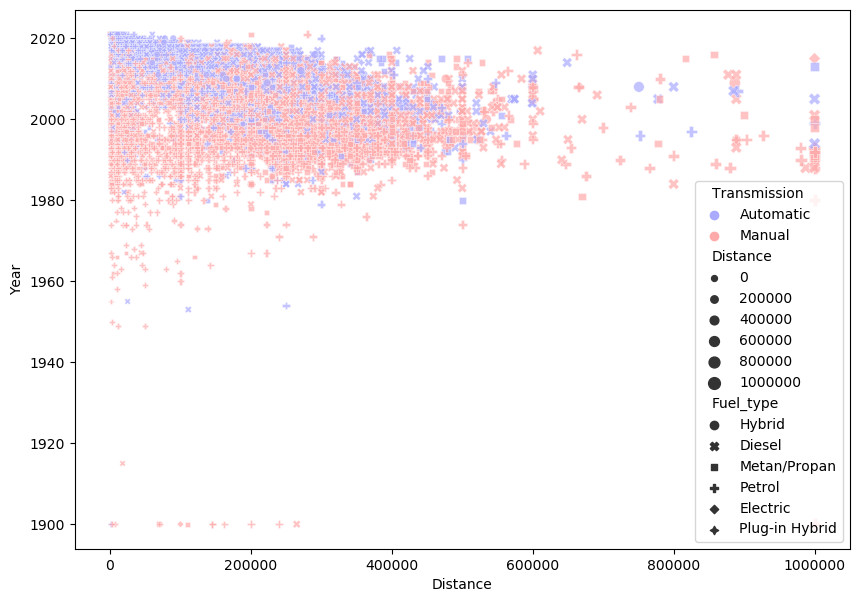

In [16]:
plt.figure(figsize = (10, 7))
sns.scatterplot(
  data=df,
  x="Distance", y="Year",
  hue = "Transmission",
  style = "Fuel_type",
  size = "Distance",
  alpha = 0.7,
  palette = 'bwr'
)

## Добавление дополнительных признаков

Для начала добавим признак "km_year" и на основе его среднего значения введём квантильные категории.

Средний пробег составляет 15000 километров в год. Отсюда разбиваем пробег на категории.

Малый пробег/Low mileage - меньше 10000
Средний пробег/Middle mileage - от 10000 до 20000
Высокий пробег/High mileage - больше 20000

In [18]:
df['Age'] = 2022 - df.Year

df['km_year'] = df.Distance/df.Age
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)

# Находим средний порог
mean = np.ceil(df["km_year"].mean())

mean_min = mean - 5000
mean_max = mean + 5000

df.to_csv("../csv/cars_moldova_clean.csv", index=False)

# Добавляем колонку
df["Distance_category"] = pd.Series(["Low mileage", "Middle mileage", "High mileage"])

# Меняем значение категории пробега в строках, на основе среднего порога.
for i, row in df.iterrows():
    if df.at[i, "km_year"] < mean_min:
      df.at[i, "Distance_category"] = "Low mileage"
  
    if df.at[i, "km_year"] > mean_max:
      df.at[i, "Distance_category"] = "High mileage"
      
    if df.at[i, "km_year"] < mean_max:
      df.at[i, "Distance_category"] = "Middle mileage"  
        
print(df.tail(5))

             Make         Model  Year      Style  Distance  \
32256  Volkswagen        Passat  2016      Sedan   88000.0   
32257  Land Rover    Freelander  2002  Crossover  225000.0   
32258       Dacia     Logan Mcv  2015  Universal   89000.0   
32259       Mazda             6  2006      Combi  370000.0   
32260     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
32256                1800.0        Petrol    Automatic      11500.0    6   
32257                1800.0  Metan/Propan       Manual       4400.0   20   
32258                1500.0        Diesel       Manual       7000.0    7   
32259                2000.0        Diesel       Manual       4000.0   16   
32260                1500.0        Diesel       Manual       4000.0   16   

            km_year Distance_category  
32256  14666.666667    Middle mileage  
32257  11250.000000    Middle mileage  
32258  12714.285714    Middle mileage  
32259  231

Добавим признак редкости/цены, на основе средней цены и редкости списке.

In [ ]:
df[category_columns].nunique()
manufacture_car_counts = df.Make.value_counts()

rare_cars = manufacture_car_counts[manufacture_car_counts < 500]
rare_cars = rare_cars.to_frame().reset_index()

# меняем заголовки
rare_cars = rare_cars.rename(columns = {'Make': "Count"})
rare_cars = rare_cars.rename(columns = {'index': "Make"})
rare_cars.index.name = 'index'

# цену редкости формируем на основе цен всех машин
average_price = np.ceil(df["Price(euro)"].mean())

df["Rarity/Price"] = pd.Series(['Rare/Cheap', 'Rare/Expensive'])

for i, row in df.iterrows():
  # если в таблице редких машин есть выбранная марка, то:
  if not rare_cars.loc[rare_cars['Make'] == df.at[i, "Make"]].empty:
    # если цена меньше среднего, то машина редкая/дешевая
    if(df.at[i, "Price(euro)"] < average_price):
      df.at[i, "Rarity/Price"] = "Rare/Cheap"
      
    # и наоборот  
    if(df.at[i, "Price(euro)"] > average_price):
      df.at[i, "Rarity/Price"] = "Rare/Expensive"  
      
df['Rarity/Price'].fillna("Not Rare", inplace=True)

print(df.tail(5))      

             Make         Model  Year      Style  Distance  \
32256  Volkswagen        Passat  2016      Sedan   88000.0   
32257  Land Rover    Freelander  2002  Crossover  225000.0   
32258       Dacia     Logan Mcv  2015  Universal   89000.0   
32259       Mazda             6  2006      Combi  370000.0   
32260     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
32256                1800.0        Petrol    Automatic      11500.0    6   
32257                1800.0  Metan/Propan       Manual       4400.0   20   
32258                1500.0        Diesel       Manual       7000.0    7   
32259                2000.0        Diesel       Manual       4000.0   16   
32260                1500.0        Diesel       Manual       4000.0   16   

            km_year Distance_category Rarity/Price  
32256  14666.666667    Middle mileage     Not Rare  
32257  11250.000000    Middle mileage   Rare/Cheap  
32258  1271

## Предворительная обработка

Выполнить обработку числовых признаков с помощью:
1. Стандартизации
2. Нормализации

Выполнить обработку категориальных признаков с помощью:
1. Ordinal encoding
2. One-hot encoding

In [ ]:
# Стандартизация
df_standartisation = df.copy()
df_mean = df[number_columns].mean()
std = df[number_columns].std()

df_standartisation[number_columns] = (df[number_columns] - df_mean) / std
df_standartisation.to_csv("cars_moldova_standartisation.csv")

# Нормализация
df_normalisation  = df.copy()
Xmin = df[number_columns].min()
Xmax = df[number_columns].max()

df_normalisation[number_columns] = (df[number_columns]- Xmin)/( Xmax - Xmin)
df_standartisation.to_csv("cars_moldova_normalisation.csv")

# One-hot
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)

df_ohe.to_csv("cars_moldova_ohe.csv")